In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To visualise the molecules, you need RDKit. Install via 
>conda install -c conda-forge rdkit

In [2]:
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw


You may also need to install an engine to read the xlsx file, 'openpyxl'
>conda install openpyxl

In [3]:
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", engine='openpyxl', verbose=False)
print(type(sol))
print(sol.shape)
print(sol.columns)

print()
display(sol)


<class 'pandas.core.frame.DataFrame'>
(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)



,0,Compound_Identifier,Source,SMILES,LogS.M.,MW,AMW,Sv,Se,Sp,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50_x000D__x000D_\n
0,1,HU_100,Huuskonen,c1ccc2ccc3nccnc3c2c1,-2.68,180.22,8.192,15.623,21.854,16.296,...,0,0,0,0,1,0,1,0,1,0_x000D__x000D_\n
1,2,HU_1000,Huuskonen,c1cnc2c(C)ncnc2n1,-0.12,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0_x000D__x000D_\n
2,3,HU_1001,Huuskonen,c1cnc2cnc(C)nc2n1,-0.47,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0_x000D__x000D_\n
3,4,HU_1002,Huuskonen,c1c(C)nc2cncnc2n1,0.06,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0_x000D__x000D_\n
4,5,HU_1003,Huuskonen,c1cnc2c(OC)ncnc2n1,-1.11,162.17,9.009,12.327,18.618,12.239,...,0,0,0,0,0,0,0,0,0,0_x000D__x000D_\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,928,HU_T2_5,Huuskonen,c1ccccc1N2C(=O)C=C(C)N2C,-0.56,188.25,7.240,16.392,25.949,17.273,...,0,0,0,0,1,0,1,0,1,0_x000D__x000D_\n
928,929,HU_T2_6,Huuskonen,n(c(nc(n1)NC(C)C)NCC)c1Cl,-3.85,215.72,7.704,16.569,28.251,17.693,...,0,0,1,0,1,0,1,0,1,0_x000D__x000D_\n
929,930,HU_T2_7,Huuskonen,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,-2.34,232.26,8.009,18.821,29.604,19.182,...,0,0,1,0,1,1,1,0,1,0_x000D__x000D_\n
930,931,HU_T2_8,Huuskonen,O=C(N(C)C)Nc(ccc(c1Cl)Cl)c1,-3.80,233.11,9.713,16.047,24.596,16.989,...,0,0,0,0,1,0,1,0,1,0_x000D__x000D_\n


In [4]:
solDesc = sol.describe()
print(sol.columns)

Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


Look at an example, the first data sample

In [5]:
for i in range(len(sol.iloc[0])):
    print(sol.columns[i], sol.iloc[0][sol.columns[i]])

0 1
Compound_Identifier HU_100
Source Huuskonen
SMILES c1ccc2ccc3nccnc3c2c1
LogS.M. -2.68
MW 180.22
AMW 8.192
Sv 15.623
Se 21.854
Sp 16.296
Si 24.242
Mv 0.71
Me 0.993
Mp 0.741
Mi 1.102
nAT 22
nSK 14
nBT 24
nBO 16
nBM 16
SCBO 24.0
RBN 0
RBF 0.0
nDB 0
nTB 0
nAB 16
nH 8
nC 12
nN 2
nO 0
nS 0
nF 0
nCL 0
nBR 0
nHM 0
nHet 2
nX 0
H% 36.4
C% 54.5
N% 9.1
O% 0.0
X% 0.0
nCsp3 0
nCsp2 12
nCsp 0
nCIC 3
nCIR 6
TRS 18
Rperim 14
Rbrid 2
MCD 1.0
RFD 0.286
RCI 1.286
NRS 1
NNRS 0.333
nR03 0
nR05 0
nR06 3
nR07 0
nR08 0
nR09 0
nR10 2
nR11 0
nR12 0
nBnz 2
ARR 1.0
D/Dtr03 0.0
D/Dtr05 0.0
D/Dtr06 62.233
D/Dtr07 0.0
D/Dtr08 0.0
D/Dtr09 0.0
D/Dtr10 69.159
D/Dtr11 0.0
D/Dtr12 0.0
ZM1 76
ZM1V 186
ZM1Kup 193.29
ZM1Mad 79.441
ZM1Per 280.68
ZM1MulPer 196.113
ZM2 91
ZM2V 211
ZM2Kup 215.93
ZM2Mad 94.886
ZM2Per 326.1
ZM2MulPer 222.319
ON0 6.333
ON0V 4.067
ON1 3.083
ON1V 1.31
Qindex 13
BBI 22
DBI 1.414
SNar 11.326
HNar 2.211
GNar 2.246
Xt 0.297
Dz 29.0
Ram 4
BLI 0.85
Pol 22
LPRS 50.995
MSD 3.317
SPI 0.0
PJI2 0.75
ECC 76


ATS3e 3.868
ATS4e 3.751
ATS5e 3.592
ATS6e 3.221
ATS7e 2.579
ATS8e 1.713
ATS1p 2.92
ATS2p 3.279
ATS3p 3.347
ATS4p 3.173
ATS5p 2.892
ATS6p 2.377
ATS7p 1.658
ATS8p 0.787
ATS1i 3.326
ATS2i 3.801
ATS3i 4.054
ATS4i 3.945
ATS5i 3.827
ATS6i 3.503
ATS7i 2.896
ATS8i 2.053
ATS1s 4.39
ATS2s 4.795
ATS3s 4.93
ATS4s 4.782
ATS5s 4.554
ATS6s 4.049
ATS7s 3.219
ATS8s 2.079
ATSC1m 3.35
ATSC2m 5.782
ATSC3m 8.511
ATSC4m 7.626
ATSC5m 7.348
ATSC6m 5.753
ATSC7m 3.319
ATSC8m 1.453
ATSC1v 2.1
ATSC2v 3.283
ATSC3v 4.679
ATSC4v 4.246
ATSC5v 3.914
ATSC6v 3.081
ATSC7v 1.88
ATSC8v 0.858
ATSC1e 0.008
ATSC2e 0.029
ATSC3e 0.079
ATSC4e 0.047
ATSC5e 0.057
ATSC6e 0.047
ATSC7e 0.024
ATSC8e 0.009
ATSC1p 1.674
ATSC2p 2.646
ATSC3p 3.599
ATSC4p 3.27
ATSC5p 2.962
ATSC6p 2.254
ATSC7p 1.317
ATSC8p 0.576
ATSC1i 0.288
ATSC2i 0.472
ATSC3i 0.597
ATSC4i 0.519
ATSC5i 0.449
ATSC6i 0.307
ATSC7i 0.151
ATSC8i 0.055
ATSC1s 3.222
ATSC2s 5.667
ATSC3s 9.889
ATSC4s 8.667
ATSC5s 10.333
ATSC6s 8.333
ATSC7s 4.556
ATSC8s 1.778
MATS1m 0.062
MATS2m -0.

Eig03_EA(ri) 1.769
Eig04_EA(ri) 1.456
Eig05_EA(ri) 1.369
Eig06_EA(ri) 0.957
Eig07_EA(ri) 0.665
Eig08_EA(ri) -0.4
Eig09_EA(ri) -0.416
Eig10_EA(ri) -0.888
Eig11_EA(ri) -0.974
Eig12_EA(ri) -1.376
Eig13_EA(ri) -1.743
Eig14_EA(ri) -1.862
Eig15_EA(ri) -2.0
Eig01_AEA(ed) 6.699
Eig02_AEA(ed) 5.71
Eig03_AEA(ed) 4.775
Eig04_AEA(ed) 3.85
Eig05_AEA(ed) 3.657
Eig06_AEA(ed) 3.541
Eig07_AEA(ed) 3.149
Eig08_AEA(ed) 2.41
Eig09_AEA(ed) 2.308
Eig10_AEA(ed) 2.0
Eig11_AEA(ed) 2.0
Eig12_AEA(ed) 1.266
Eig13_AEA(ed) 1.26
Eig14_AEA(ed) 0.743
Eig15_AEA(ed) 0.325
Eig01_AEA(bo) 4.642
Eig02_AEA(bo) 3.914
Eig03_AEA(bo) 3.306
Eig04_AEA(bo) 2.986
Eig05_AEA(bo) 2.914
Eig06_AEA(bo) 2.5
Eig07_AEA(bo) 2.186
Eig08_AEA(bo) 1.086
Eig09_AEA(bo) 1.073
Eig10_AEA(bo) 0.591
Eig11_AEA(bo) 0.5
Eig12_AEA(bo) 0.086
Eig13_AEA(bo) -0.284
Eig14_AEA(bo) -0.5
Eig15_AEA(bo) -0.5
Eig01_AEA(dm) 3.142
Eig02_AEA(dm) 2.414
Eig03_AEA(dm) 1.806
Eig04_AEA(dm) 1.486
Eig05_AEA(dm) 1.414
Eig06_AEA(dm) 1.0
Eig07_AEA(dm) 0.686
Eig08_AEA(dm) -0.414
Eig

F09[C-C] 0
F09[C-N] 0
F09[C-O] 0
F09[C-S] 0
F09[C-F] 0
F09[C-Cl] 0
F09[N-N] 0
F09[N-O] 0
F09[N-F] 0
F09[N-Cl] 0
F09[O-O] 0
F09[O-S] 0
F09[O-Cl] 0
F10[C-C] 0
F10[C-N] 0
F10[C-O] 0
F10[C-S] 0
F10[C-F] 0
F10[C-Cl] 0
F10[N-N] 0
F10[N-O] 0
F10[N-S] 0
F10[N-Cl] 0
F10[O-O] 0
F10[O-S] 0
F10[O-F] 0
F10[Cl-Cl] 0
Uc 4.087
Ui 3.17
Hy -0.835
AMR 53.901
TPSA(NO) 25.78
TPSA(Tot) 25.78
MLOGP 1.898
MLOGP2 3.604
ALOGP 2.203
ALOGP2 4.851
SAtot 212.126
SAacc 33.571
SAdon 0.0
Vx 227.94
VvdwMG 96.795
VvdwZAZ 149.9
PDI 1.075
BLTF96 -3.0
BLTD48 -3.12
BLTA96 -3.13
DLS_01 1.0
DLS_02 0.67
DLS_03 0.83
DLS_04 0.4
DLS_05 0.0
DLS_06 1.0
DLS_07 1.0
DLS_cons 0.7
LLS_01 1.0
LLS_02 1.0
CMC-80 1
CMC-50 0
Inflammat-80 0
Inflammat-50 0
Depressant-80 0
Depressant-50 0
Psychotic-80 0
Psychotic-50 0
Hypertens-80 0
Hypertens-50 0
Hypnotic-80 1
Hypnotic-50 0
Neoplastic-80 1
Neoplastic-50 0
Infective-80 1
Infective-50_x000D__x000D_
 0_x000D__x000D_



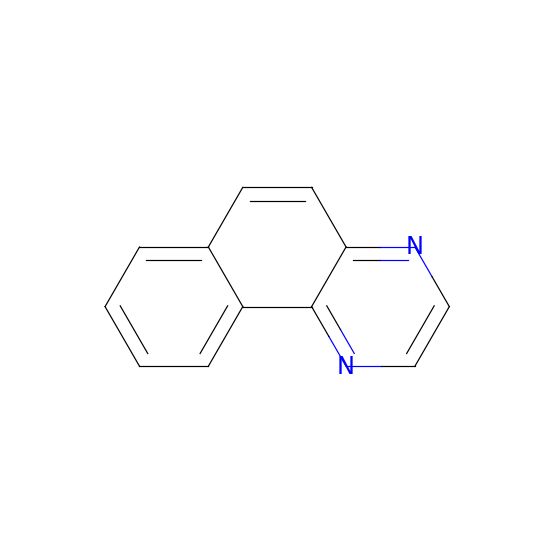

In [6]:
mol = Chem.MolFromSmiles(sol.iloc[0]['SMILES'])
fig = Draw.MolToMPL(mol)
plt.axis('off')
plt.show()

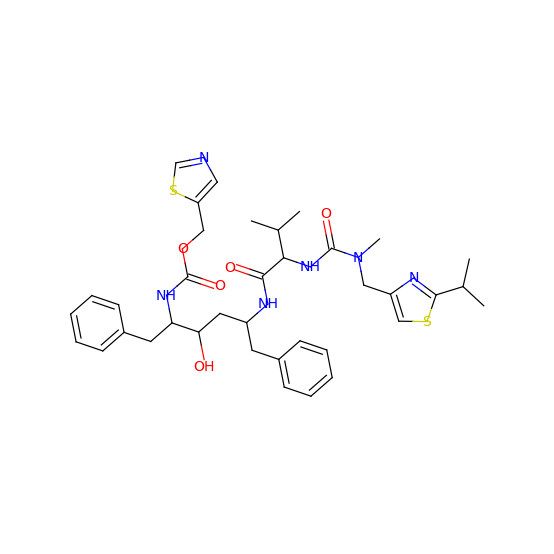

In [7]:
ritonavir = 'CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O'
ritonavir_mol = Chem.MolFromSmiles(ritonavir)
fig = Draw.MolToMPL(ritonavir_mol)
plt.axis('off')
plt.show()

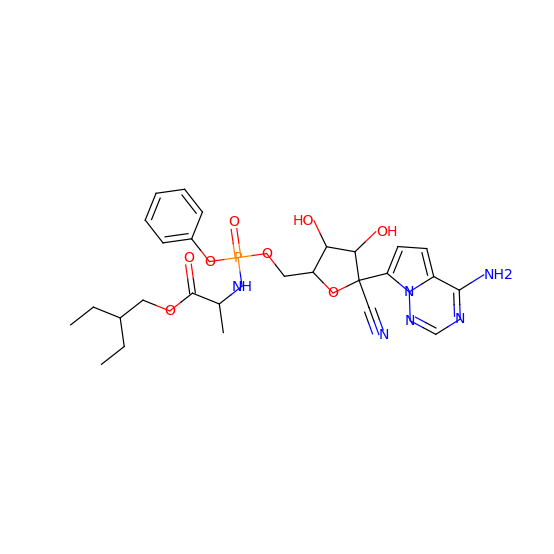

In [8]:
remdesivir = 'CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4'
remdesivir_mol = Chem.MolFromSmiles(remdesivir)
fig = Draw.MolToMPL(remdesivir_mol)
plt.axis('off')
plt.show()

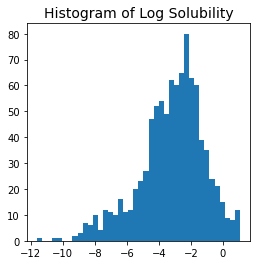

In [9]:
y = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(y, bins=40)
ax.set_title("Histogram of Log Solubility", fontsize=14);

Extract the data we are going to use to do the prediction

In [10]:
X = sol[sol.columns[5:-1]] # getting the relevant data
print(sol.columns[5:-1])
col_labels = sol.columns[5:-1]
X = X.to_numpy()
N, p = X.shape
print(X.shape)
print(y.shape)

Index(['MW', 'AMW', 'Sv', 'Se', 'Sp', 'Si', 'Mv', 'Me', 'Mp', 'Mi',
       ...
       'Depressant-50', 'Psychotic-80', 'Psychotic-50', 'Hypertens-80',
       'Hypertens-50', 'Hypnotic-80', 'Hypnotic-50', 'Neoplastic-80',
       'Neoplastic-50', 'Infective-80'],
      dtype='object', length=2255)
(932, 2255)
(932,)


In [11]:
print(col_labels[:5])

Index(['MW', 'AMW', 'Sv', 'Se', 'Sp'], dtype='object')


Split data up in to train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Regularised L2 regression

Implement using matrix multiplication: 

$ \hat{w} = (X^T X + \gamma I) X^Ty$

$ \hat{y} = \hat{w} X$

In [13]:
gamma = 2.3
# get weights 
shape = X_train.shape
print(shape)
w = np.linalg.inv(X_train.T @ X_train + gamma * np.identity(shape[1])) @ X_train.T @ y_train
print(w.shape)
# use it to estimate results
y_hat_train = X_train @ w
y_hat_test  = X_test @ w

(652, 2255)
(2255,)


Plot training and test predictions

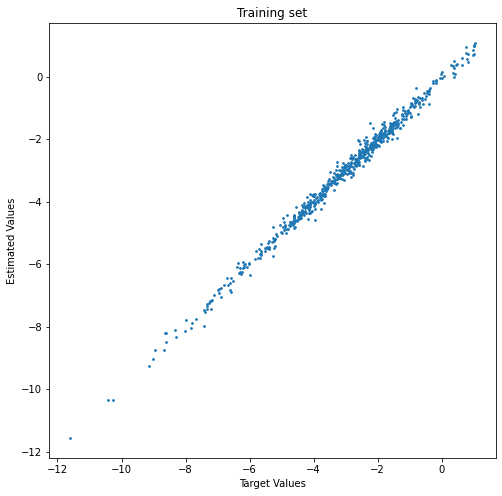

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, y_hat_train, s=3);
plt.xlabel('Target Values')
plt.ylabel('Estimated Values')
plt.title("Training set");

Do the same for the test values. Identify those which don't fit the pattern. 

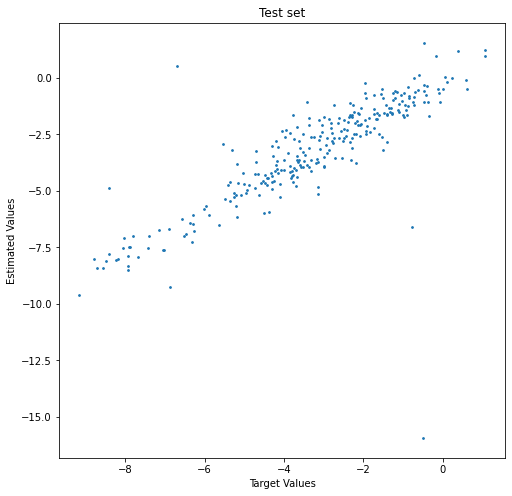

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_hat_test, s=3);
plt.xlabel('Target Values')
plt.ylabel('Estimated Values')
plt.title("Test set");

Can you see anything they have in common?

Measure your success


RMSE for test data: 1.3223901720938336
RMSE for train data: 0.17040552326305225
280
[['c1ccccc1NC(=O)NN'], ['COc1ccc2C=CC(=O)Oc2c1CC=C(C)C'], ['O=C1C(Br)=C(N)C=NN1c2ccccc2'], ['OCCN4CCN(CCCN2c1ccccc1Sc3ccc(Cl)cc23)CC4'], ['N#CC(c2ccccc2)OC3(C(C(O)(H)C(C(O3)(COC1(C(C(O)(H)C(C(O1)(CO)H)(O)H)(O)H)H)H)(O)H)(O)H)H'], ['FC(F)(F)c(cccc1C(n(ncn2)c2)(c(cccc3)c3)c(cccc4)c4)c1'], ['c1cc(F)ccc1CCl'], ['n(cccc1O)c1'], ['OC1C(O)C(O)C(O)C(O)C1'], ['C1C(=O)C=C2CCC3C4CCC(=O)C4(C)CCC3C2(C)C1'], ['O=C(OCCN(CC)CC)c(ccc(N)c1)c1'], ['c1cnc2c(S)ncnc2n1'], ['O=C(N)c(cccn1)c1'], ['O=NN(c(cccc1)c1)c(cccc2)c2'], ['Cc1ccc2C(=O)C(C(=O)O)=CN(CC)c2n1'], ['ClC1CC2C(C1Cl)C3(Cl)C(=C(Cl)C2(Cl)C3(Cl)Cl)Cl'], ['c1c(OC)cc2c(CC(=O)O)c(C)n(C(=O)C=Cc3ccccc3)c2c1'], ['O=C(c(c(C(=O)c1cccc2)ccc3)c3)c12'], ['COc2cc(Cc1cnc(N)nc1N)cc(OC)c2OC'], ['s(c(c(c1cccc2)ccc3)c3)c12'], ['C1CNCCN1c2ncc3C(=O)C(C(=O)O)=CN(CC)c3n2'], ['c1ccccc1N(C)C'], ['CCC1NC(=O)NC1(=O)'], ['O=C(NCCCC)NS(=O)(=O)c(ccc(N)c1)c1'], ['n(c(c(c(c1)C)ccc2c(ccn3)C)c23)c

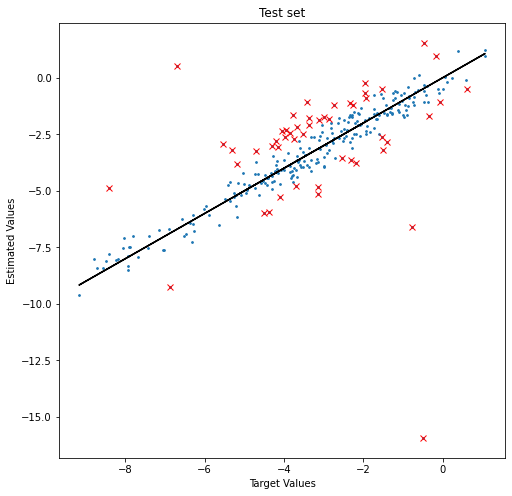

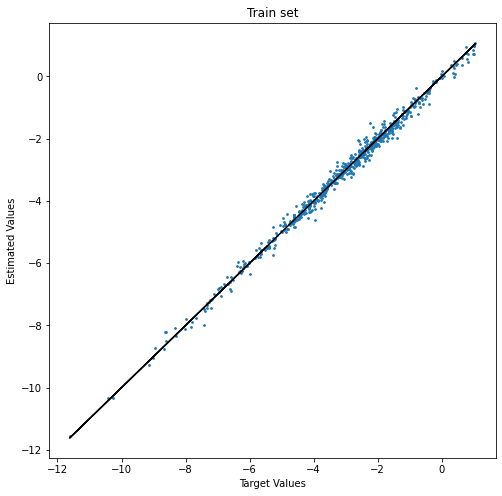

In [110]:
from sklearn.metrics import mean_squared_error
import math

def RMSE(yActual, yPredicted, outlierThreshold, testOrTrain):
    MSE = mean_squared_error(yActual, yPredicted)

    RMSE = math.sqrt(MSE)
    print(f"RMSE for {testOrTrain} data: {RMSE}")
    
    residuals = []
    for i in range(len(yActual)):
        residual = yActual[i]-yPredicted[i]
        residuals.append(residual)
    
    outliers = [resid for resid in residuals if abs(resid) > outlierThreshold]
    outlierIndices = [residuals.index(outlier) for outlier in outliers]

    yActualValsOutliers = [yActual[outlierIndex] for outlierIndex in outlierIndices]
    yPredictedValsOutliers = [yPredicted[outlierIndex] for outlierIndex in outlierIndices]
    
    
    plt.figure(figsize=(8,8))
    plt.scatter(yActual, yPredicted, s=3)
    plt.xlabel('Target Values')
    plt.ylabel('Estimated Values')
    plt.title(f"{testOrTrain.capitalize()} set")
    
    plt.plot(yActual, yActual, "k-")
    
    plt.plot(yActualValsOutliers, yPredictedValsOutliers, "rx")
    
    return outlierIndices

    
outlierThreshold = 1
outlierIndices = RMSE(y_test, y_hat_test, outlierThreshold, "test")
RMSE(y_train, y_hat_train, outlierThreshold, "train")








#Bunch of extra stuff, dw too much about it

XTestOutlierVals = []
yTestOutlierVals = []
print(len(X_test))
for i in outlierIndices:
    XTestOutlierVals.append(X_test[i])
    yTestOutlierVals.append(y_test[i])


#print(XTestOutlierVals)
#print(yTestOutlierVals)

outlierStructures = []
for i in range(len(yTestOutlierVals)):
    selectedRow = sol.loc[(sol['LogS.M.'] == yTestOutlierVals[i]) & (sol["MW"] == XTestOutlierVals[i][0])]
    #print(selectedRow["SMILES"].value())
    #print()
    outlierStructures.append(list(selectedRow["SMILES"].astype("string")))


print(outlierStructures)
outlierStructures = [outlierStruct[0] for outlierStruct in outlierStructures]
print()
print(outlierStructures)



Number of features used: 2241/2255


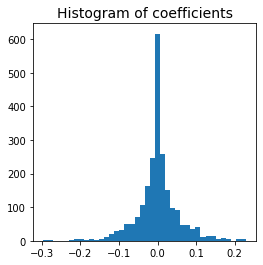

In [17]:
print(f"Number of features used: {np.sum(w != 0)}/{X.shape[1]}")

fig, ax = plt.subplots(figsize=(4,4))
ax.hist(w, bins=40)
ax.set_title("Histogram of coefficients", fontsize=14);

Try L1 regularisation..

Compare with L2.. what do you see?

RMSE for test data: 0.9029213059950386
RMSE for train data: 0.8731207951483199
Number of features used: 20/2255
2255


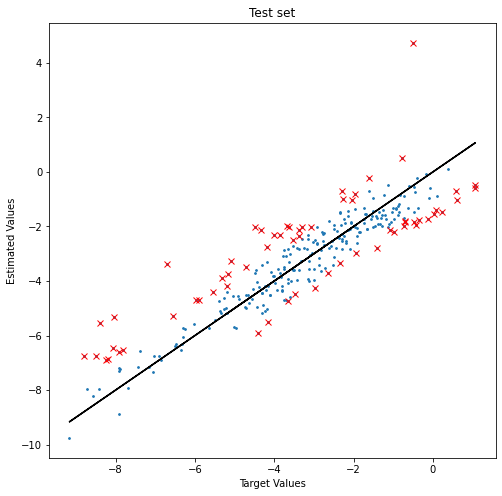

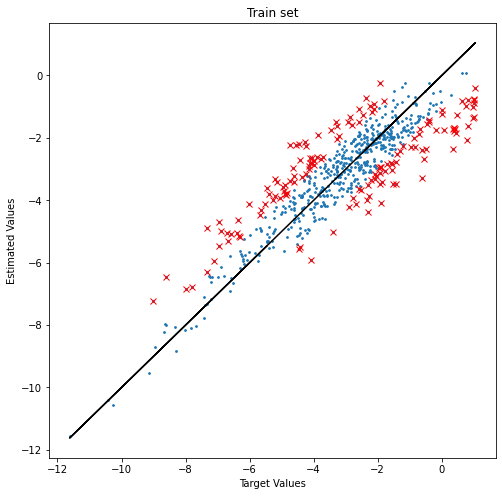

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2.3, max_iter=100000).fit(X_train, y_train)
lasso_yHatTest = lasso.predict(X_test)
lasso_yHatTrain = lasso.predict(X_train)


garbo = RMSE(y_test, lasso_yHatTest, outlierThreshold, "test")
garbo = RMSE(y_train, lasso_yHatTrain, outlierThreshold, "train")

print(f"Number of features used: {np.sum(lasso.coef_ != 0)}/{X.shape[1]}")
print(len(lasso.coef_))

### Boruta time (L1)

In [61]:
#Boruta time - info from https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a
from boruta import BorutaPy
X_train = np.array(X_train)
y_train = np.array(y_train)

# define Boruta feature selection method
feat_selector = BorutaPy(lasso, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)

KeyError: 'max_depth'

In [ ]:
from sklearn.feature_selection import RFE


# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
rfe.fit(X_train, y_train)
# transform the data
X_train, y_train = rfe.transform(X_train, y_train)